# Shannon's Demon

Trading Pairs

- ARKK:SARK
- LABU:LABD
- SOXL:SOXS
- TNA:TZA
- TQQQ:SQQQ


In [292]:
%matplotlib inline
import glob
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [293]:
path = '/Users/markconway/Projects/alphapy-root/alphapy-markets/Projects/Shannon/data'
extension = 'csv'
os.chdir(path)
files = glob.glob('*.{}'.format(extension))
print(files)

['SMH.csv', 'TRX-USD.csv', 'TQQQ.csv', 'SOXS.csv', 'ETH-USD.csv', 'BTBT.csv', 'BSQR.csv', 'ALGO-USD.csv', 'HEX-USD.csv', 'BTC-USD.csv', 'EOS-USD.csv', 'XTZ-USD.csv', 'TNA.csv', 'AHPI.csv', 'ALF.csv', 'SPRT.csv', 'AFRM.csv', 'XRP-USD.csv', 'ADA-USD.csv', 'MATIC-USD.csv', 'TZA.csv', 'UVXY.csv', 'DOGE-USD.csv', 'TSLA.csv', '^VIX.csv', 'FIL-USD.csv', 'LINK-USD.csv', 'SOXL.csv', 'SQQQ.csv', 'LABD.csv', 'AAPL.csv', 'WMT.csv', 'JNJ.csv', 'LABU.csv', 'THETA-USD.csv', 'DX-Y.NYB.csv']


In [294]:
symbol = 'XRP-USD'
symbol

'XRP-USD'

In [295]:
filename = '.'.join([symbol, 'csv'])
df = pd.read_csv(filename)
start_date = '2010-01-01'
df = df[df['Date'] >= start_date]

In [296]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-19,0.372647,0.423387,0.370944,0.417700,0.417700,2803922255
1,2019-05-20,0.417456,0.417456,0.384647,0.398003,0.398003,2258366889
2,2019-05-21,0.398209,0.403105,0.389302,0.397603,0.397603,1811582122
3,2019-05-22,0.397493,0.407428,0.373879,0.376637,0.376637,2028827460
4,2019-05-23,0.376736,0.383126,0.366805,0.381204,0.381204,1595345471
...,...,...,...,...,...,...,...
1823,2024-05-15,0.499889,0.519621,0.497450,0.519004,0.519004,1118098628
1824,2024-05-16,0.519012,0.521331,0.513104,0.515698,0.515698,1152212983
1825,2024-05-17,0.515699,0.528870,0.513998,0.523804,0.523804,1015239692
1826,2024-05-18,0.523804,0.525628,0.519520,0.521390,0.521390,496850725


In [297]:
capital = 10000
cash_frac = 0.5
cash_value = cash_frac * capital
rebalance_pct = 0.5
print("Starting Capital: %0.2f Cash Value: %0.2f" % (capital, cash_value))

Starting Capital: 10000.00 Cash Value: 5000.00


In [298]:
starting_price = df.iloc[0]['Close']
new_low = starting_price
for index, row in df[1:].iterrows():
    c = row['Close']
    d = row['Date']
    if c < new_low:
        new_low = c
        print(f"Row: {index} Date: {d} New Low: {new_low}")
    if new_low / starting_price <= 0.9:
        final_index = index
        final_price = c
        final_date = d
        nshares = cash_value / final_price
        print("Final Index: %d, Final Price: %.2f" % (final_index, final_price))
        break

Row: 1 Date: 2019-05-20 New Low: 0.398003
Row: 2 Date: 2019-05-21 New Low: 0.397603
Row: 3 Date: 2019-05-22 New Low: 0.376637
Row: 52 Date: 2019-07-10 New Low: 0.363775
Final Index: 52, Final Price: 0.36


In [299]:
def get_new_targets(rebalance_pct, price):
    low_target = price * (1.0 - rebalance_pct)
    high_target = price  / (1.0 - rebalance_pct)
    return low_target, high_target

In [300]:
final_price

0.363775

In [301]:
low_target, high_target = get_new_targets(rebalance_pct, final_price)

In [302]:
all_records = []
for index, row in df[final_index+1:].iterrows():
    cp = row['Close']
    cd = row['Date']
    position_value = nshares * cp
    total_balance = cash_value + position_value
    half_balance = total_balance / 2.0
    if cp < low_target:
        print("%s Low Target Hit : %f" % (cd, low_target))
        hit_low = True
        rebalance_amount = half_balance - position_value
        shares_to_add = rebalance_amount / cp
        nshares += shares_to_add
        cash_value -= rebalance_amount
        position_value = nshares * cp
        low_target, high_target = get_new_targets(rebalance_pct, cp)
        print("New Low Target: %f, New High Target; %f" % (low_target, high_target))
    elif cp > high_target:
        print("%s High Target Hit: %f" % (cd, high_target))
        rebalance_amount = position_value - half_balance
        shares_to_subtract = rebalance_amount / cp
        nshares -= shares_to_subtract
        cash_value += rebalance_amount
        position_value = nshares * cp
        low_target, high_target = get_new_targets(rebalance_pct, cp)
        print("New Low Target: %f, New High Target; %f" % (low_target, high_target))
    all_records.append((symbol, row['Date'], cp, nshares, position_value, cash_value, total_balance))

2020-03-12 Low Target Hit : 0.181888
New Low Target: 0.069818, New High Target; 0.279270
2020-08-01 High Target Hit: 0.279270
New Low Target: 0.144764, New High Target; 0.579058
2020-11-23 High Target Hit: 0.579058
New Low Target: 0.306990, New High Target; 1.227960
2020-12-23 Low Target Hit : 0.306990
New Low Target: 0.129301, New High Target; 0.517204
2021-02-11 High Target Hit: 0.517204
New Low Target: 0.262394, New High Target; 1.049574
2021-04-06 High Target Hit: 1.049574
New Low Target: 0.548133, New High Target; 2.192532
2021-06-22 Low Target Hit : 0.548133
New Low Target: 0.272533, New High Target; 1.090134
2021-08-14 High Target Hit: 1.090134
New Low Target: 0.640206, New High Target; 2.560824
2022-01-21 Low Target Hit : 0.640206
New Low Target: 0.317869, New High Target; 1.271476
2022-06-13 Low Target Hit : 0.317869
New Low Target: 0.155401, New High Target; 0.621604
2023-07-13 High Target Hit: 0.621604
New Low Target: 0.407683, New High Target; 1.630730


In [303]:
df1 = pd.DataFrame(all_records, columns=['symbol', 'date', 'close', 'shares', 'position_value', 'cash_value', 'total_balance'])

In [304]:
df1['daily_return'] = df1['close'].pct_change()

In [305]:
df1['cumulative_return'] = 100 * (np.exp(np.log1p(df1['daily_return']).cumsum()) - 1.0)

In [306]:
df1['type'] = 'buy and hold'

In [307]:
df1.head()

,symbol,date,close,shares,position_value,cash_value,total_balance,daily_return,cumulative_return,type
0,XRP-USD,2019-07-11,0.330335,13744.75981,4540.375232,5000.0,9540.375232,NaN,NaN,buy and hold
1,XRP-USD,2019-07-12,0.344118,13744.75981,4729.819256,5000.0,9729.819256,0.041724,4.172431,buy and hold
2,XRP-USD,2019-07-13,0.332179,13744.75981,4565.720569,5000.0,9565.720569,-0.034694,0.558221,buy and hold
3,XRP-USD,2019-07-14,0.306426,13744.75981,4211.751770,5000.0,9211.751770,-0.077527,-7.237804,buy and hold
4,XRP-USD,2019-07-15,0.315310,13744.75981,4333.860216,5000.0,9333.860216,0.028992,-4.548413,buy and hold


In [308]:
df1.tail()

,symbol,date,close,shares,position_value,cash_value,total_balance,daily_return,cumulative_return,type
1770,XRP-USD,2024-05-15,0.519004,21395.646484,11104.426108,17445.261295,28549.687403,0.038243,57.114444,buy and hold
1771,XRP-USD,2024-05-16,0.515698,21395.646484,11033.692101,17445.261295,28478.953396,-0.006370,56.113642,buy and hold
1772,XRP-USD,2024-05-17,0.523804,21395.646484,11207.125211,17445.261295,28652.386506,0.015719,58.567515,buy and hold
1773,XRP-USD,2024-05-18,0.521390,21395.646484,11155.476120,17445.261295,28600.737416,-0.004609,57.836741,buy and hold
1774,XRP-USD,2024-05-19,0.514798,21395.646484,11014.436019,17445.261295,28459.697314,-0.012643,55.841192,buy and hold


In [309]:
df2 = pd.DataFrame(all_records, columns=['symbol', 'date', 'close', 'shares', 'position_value', 'cash_value', 'total_balance'])

In [310]:
df2['daily_return'] = df2['total_balance'].pct_change()

In [311]:
df2['cumulative_return'] = 100 * (np.exp(np.log1p(df2['daily_return']).cumsum()) - 1.0)

In [312]:
df2['type'] = 'rebalanced'

In [313]:
df2.head()

,symbol,date,close,shares,position_value,cash_value,total_balance,daily_return,cumulative_return,type
0,XRP-USD,2019-07-11,0.330335,13744.75981,4540.375232,5000.0,9540.375232,NaN,NaN,rebalanced
1,XRP-USD,2019-07-12,0.344118,13744.75981,4729.819256,5000.0,9729.819256,0.019857,1.985708,rebalanced
2,XRP-USD,2019-07-13,0.332179,13744.75981,4565.720569,5000.0,9565.720569,-0.016866,0.265664,rebalanced
3,XRP-USD,2019-07-14,0.306426,13744.75981,4211.751770,5000.0,9211.751770,-0.037004,-3.444555,rebalanced
4,XRP-USD,2019-07-15,0.315310,13744.75981,4333.860216,5000.0,9333.860216,0.013256,-2.164642,rebalanced


In [314]:
df2.tail()

,symbol,date,close,shares,position_value,cash_value,total_balance,daily_return,cumulative_return,type
1770,XRP-USD,2024-05-15,0.519004,21395.646484,11104.426108,17445.261295,28549.687403,0.014535,199.251200,rebalanced
1771,XRP-USD,2024-05-16,0.515698,21395.646484,11033.692101,17445.261295,28478.953396,-0.002478,198.509783,rebalanced
1772,XRP-USD,2024-05-17,0.523804,21395.646484,11207.125211,17445.261295,28652.386506,0.006090,200.327669,rebalanced
1773,XRP-USD,2024-05-18,0.521390,21395.646484,11155.476120,17445.261295,28600.737416,-0.001803,199.786295,rebalanced
1774,XRP-USD,2024-05-19,0.514798,21395.646484,11014.436019,17445.261295,28459.697314,-0.004931,198.307945,rebalanced


In [315]:
df_both = pd.concat([df1, df2])
df_both['date'] = pd.to_datetime(df_both['date'])
df_both.dropna(inplace=True)
df_both.reset_index(inplace=True)
df_both

,index,symbol,date,close,shares,position_value,cash_value,total_balance,daily_return,cumulative_return,type
0,1,XRP-USD,2019-07-12,0.344118,13744.759810,4729.819256,5000.000000,9729.819256,0.041724,4.172431,buy and hold
1,2,XRP-USD,2019-07-13,0.332179,13744.759810,4565.720569,5000.000000,9565.720569,-0.034694,0.558221,buy and hold
2,3,XRP-USD,2019-07-14,0.306426,13744.759810,4211.751770,5000.000000,9211.751770,-0.077527,-7.237804,buy and hold
3,4,XRP-USD,2019-07-15,0.315310,13744.759810,4333.860216,5000.000000,9333.860216,0.028992,-4.548413,buy and hold
4,5,XRP-USD,2019-07-16,0.296726,13744.759810,4078.427599,5000.000000,9078.427599,-0.058939,-10.174217,buy and hold
...,...,...,...,...,...,...,...,...,...,...,...
3543,1770,XRP-USD,2024-05-15,0.519004,21395.646484,11104.426108,17445.261295,28549.687403,0.014535,199.251200,rebalanced
3544,1771,XRP-USD,2024-05-16,0.515698,21395.646484,11033.692101,17445.261295,28478.953396,-0.002478,198.509783,rebalanced
3545,1772,XRP-USD,2024-05-17,0.523804,21395.646484,11207.125211,17445.261295,28652.386506,0.006090,200.327669,rebalanced
3546,1773,XRP-USD,2024-05-18,0.521390,21395.646484,11155.476120,17445.261295,28600.737416,-0.001803,199.786295,rebalanced


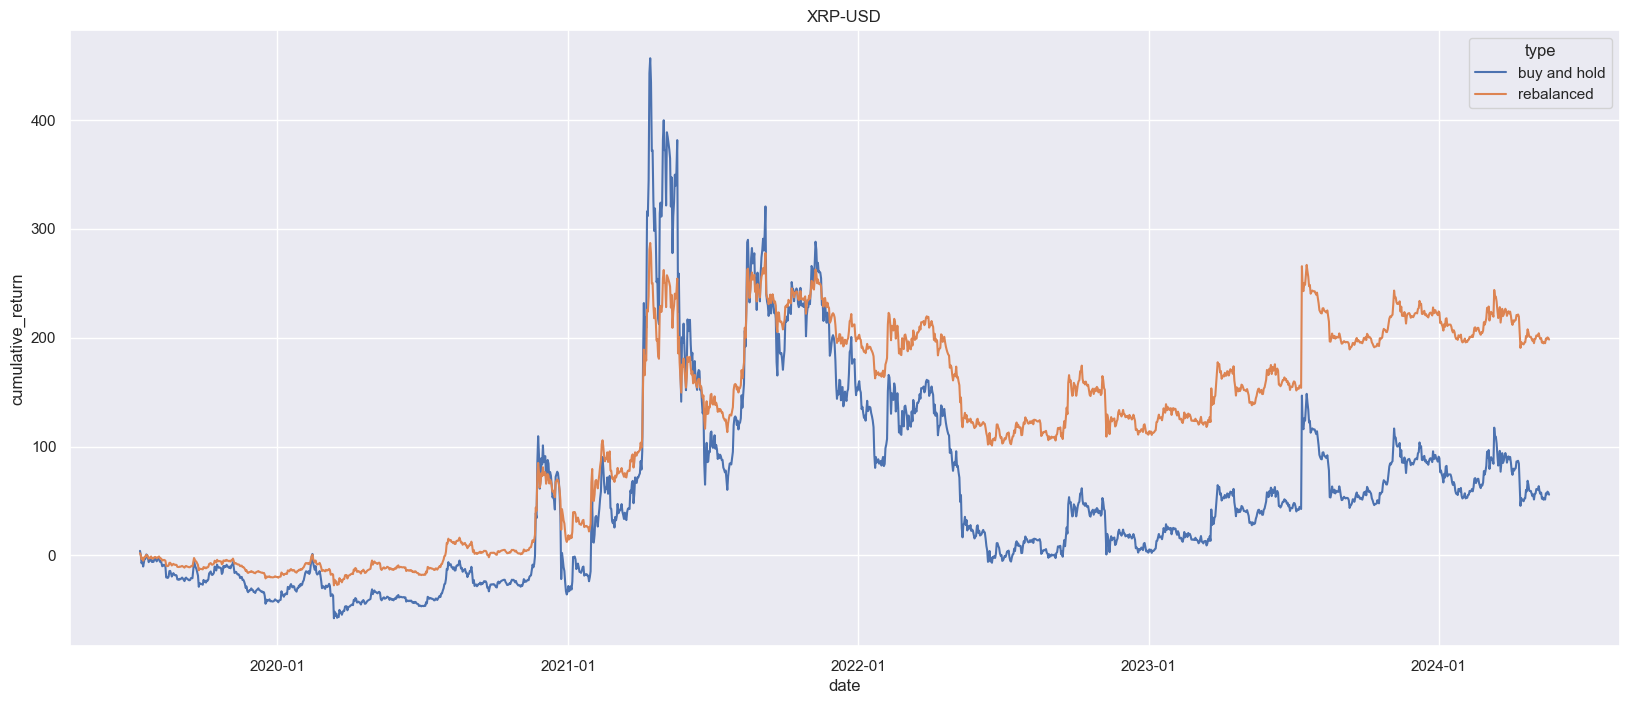

In [316]:
sns.set(rc={'figure.figsize' : (20, 8)})
g = sns.lineplot(x='date', y='cumulative_return', hue='type', data = df_both)
g.set(title=symbol)
date_format = mdates.DateFormatter("%Y-%m")
g.xaxis.set_major_formatter(date_format)